In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
train_data = pd.read_csv('./data/train.csv', index_col='index')
test_data = pd.read_csv('./data/test_x.csv', index_col='index')

In [3]:
train_data.shape

(45532, 77)

In [4]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1


In [5]:
train_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,4.716689e+04,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.006402e+07,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.

In [6]:
train_data.loc[(train_data['familysize'] > 10), 'familysize'] = train_data['familysize'].median()

In [7]:
train_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
count,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,4.553200e+04,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000,45532.000000
mean,2.129535,9.453570e+02,2.904463,2.189589e+03,3.662347,1484.294518,1.749078,1.490672e+03,2.317952,1.899292e+03,2.168145,1.850650e+03,2.560595,1.284608e+03,2.317952,4.584272e+03,3.157691,4.068434e+03,3.575529,2.576363e+03,3.813933,2.038986e+03,4.325727,3.741018e+03,3.509620,2.050287e+03,2.632896,959.880502,3.217232,1.435762e+03,3.071752,1.633479e+03,2.840464,1.154352e+03,2.823487,2.470808e+03,3.432948,1.164117e+03,3.225687,2.240057e+03,2.544474,1.271326,2.570017,1.170715,1.387112,3.017241,2.621189,1.768712,3.041246,1.335918,2.472217,2.031099,3.507226,2.277497,4.317996,2.180401,1.546824,0.079592,0.163665,0.118356,0.709721,0.934793,0.208974,0.868708,0.895722,0.328538,0.938900,0.972195,0.202824,0.946104,0.395195,0.947729,0.927040
std,1.196952,1.307565e+04,1.566142,3.351027e+04,1.431494,8977.664318,1.043625,1.092260e+04,1.369205,1.670765e+04,1.348653,7.608236e+04,1.510600,9.756584e+03,1.460813,5.020265e+05,1.481740,1.141738e+05,1.361220,5.411432e+04,1.372551,3.069164e+04,1.146992,3.663672e+05,1.375134,7.530787e+04,1.473022,5869.964127,1.476414,1.084997e+04,1.489744,2.600221e+04,1.404342,2.250689e+04,1.424383,1.482890e+05,1.374938,7.433515e+03,1.521603,6.730924e+04,0.941328,0.448436,1.375461,0.468883,0.639987,2.007713,1.897081,1.685069,2.037278,1.452544,2.000658,1.785824,1.971456,1.848783,1.722793,0.762647,0.497808,0.270664,0.369975,0.323033,0.453896,0.246893,0.406580,0.337723,0.305625,0.469687,0.239516,0.164414,0.402107,0.225815,0.488898,0.222575,0.260073
min,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,2.600000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,25.000000,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,0.000000e+00,1.000000,2.500000e+01,1.000000,2.500000e+01,1.000000,2.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.040000e+02,1.000000,8.750000e+02,2.000000,651.000000,1.000000,6.790000e+02,1.000000,8.340000e+02,1.000000,5.040000e+02,1.000000,5.490000e+02,1.000000,1.077000e+03,2.000000,1.259000e+03,2.000000,9.020000e+02,3.000000,8.590000e+02,4.000000,8.060000e+02,2.000000,6.500000e+02,1.000000,428.000000,2.000000,6.380000e+02,2.000000,7.060000e+02,2.000000,4.610000e+02,2.000000,7.940000e+02,2.000000,5.270000e+02,2.000000,7.330000e+02,2.000000,1.000000,2.000000,1.000

In [8]:
Q_E = ['QaE','QbE','QcE','QdE','QeE','QfE','QgE','QhE','QiE','QjE',
       'QkE','QlE','QmE','QnE','QoE','QpE','QqE','QrE','QsE','QtE']

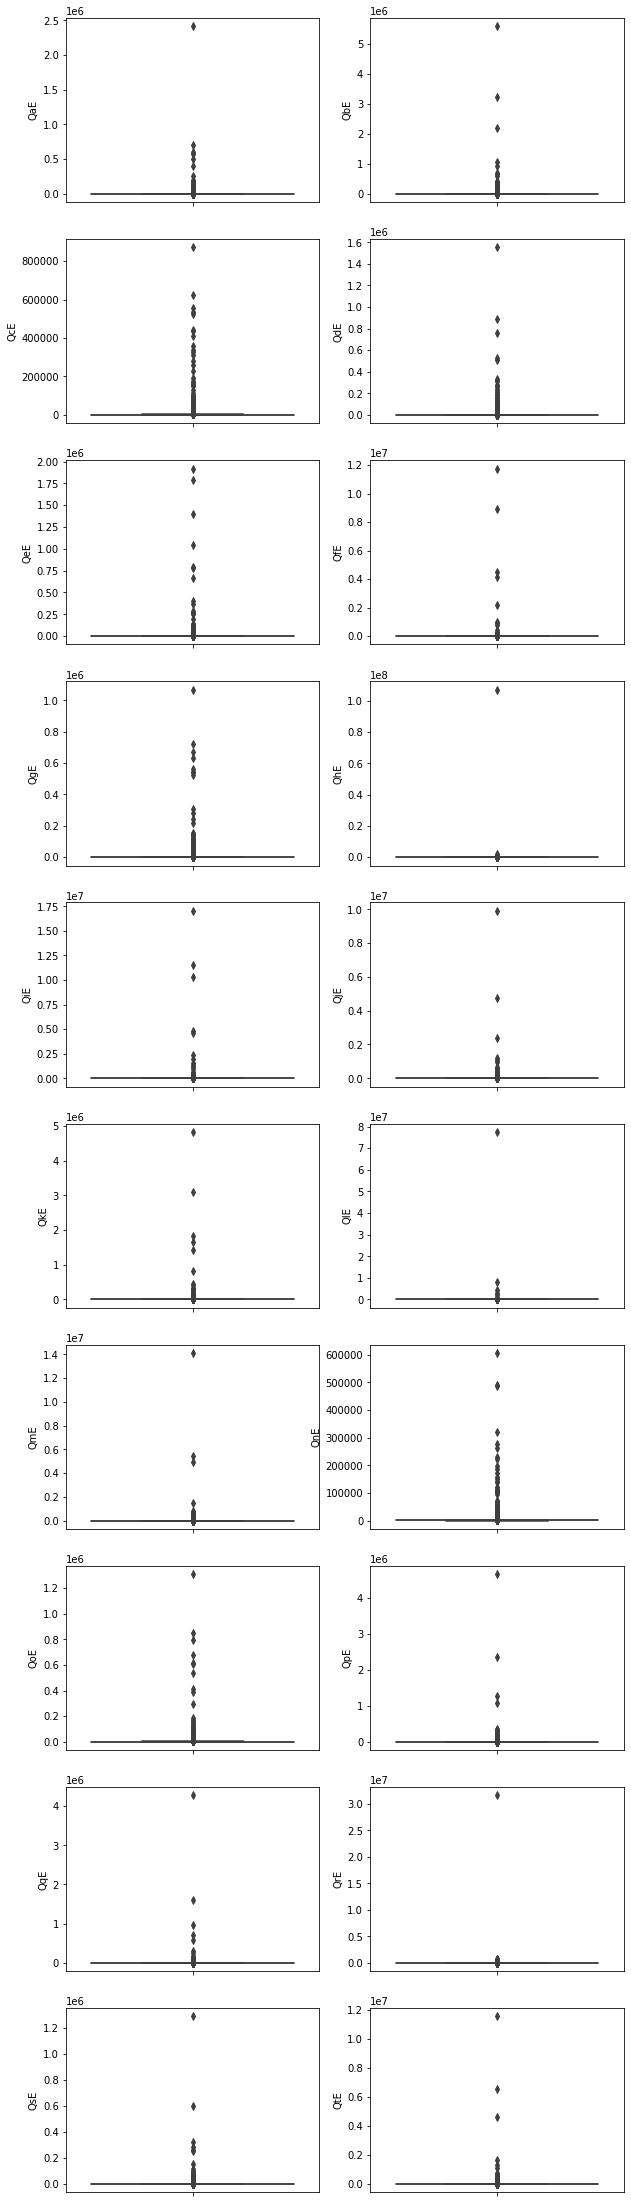

In [9]:
fig, axs = plt.subplots(figsize=(10,40), nrows=10, ncols=2, squeeze=False)
idx = 0
for row in range(0,10):
    for col in range(0,2):
        sns.boxplot(y=Q_E[idx], data=train_data, ax=axs[row][col])
        idx += 1

In [10]:
train_data[train_data['QaE'] > train_data['QaE'].quantile(.75)].shape

(11376, 77)

In [11]:
for column in Q_E:
    print(column, ' : ', train_data[train_data[column] > 10000].shape)

QaE  :  (141, 77)
QbE  :  (548, 77)
QcE  :  (316, 77)
QdE  :  (300, 77)
QeE  :  (489, 77)
QfE  :  (207, 77)
QgE  :  (249, 77)
QhE  :  (517, 77)
QiE  :  (1005, 77)
QjE  :  (784, 77)
QkE  :  (436, 77)
QlE  :  (388, 77)
QmE  :  (403, 77)
QnE  :  (156, 77)
QoE  :  (296, 77)
QpE  :  (326, 77)
QqE  :  (173, 77)
QrE  :  (470, 77)
QsE  :  (220, 77)
QtE  :  (431, 77)


In [12]:
temp_train_data = train_data
for column in Q_E:
    temp_train_data = temp_train_data[temp_train_data[column] < 15000]
train_data.shape, temp_train_data.shape

((45532, 77), (42512, 77))

In [13]:
train_data['voted'].value_counts() / train_data.shape[0]

2    0.546824
1    0.453176
Name: voted, dtype: float64

In [14]:
temp_train_data['voted'].value_counts() / temp_train_data.shape[0]

2    0.546787
1    0.453213
Name: voted, dtype: float64

<AxesSubplot:xlabel='QaE_log', ylabel='Count'>

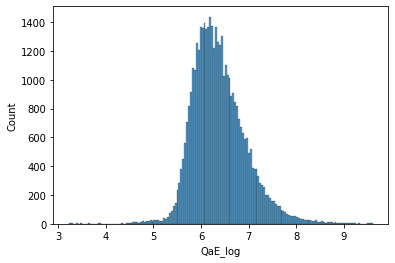

In [15]:
temp_train_data['QaE_log'] = np.log(temp_train_data['QaE'])
sns.histplot(x='QaE_log', data=temp_train_data)

In [16]:
for column in Q_E:
    train_data = train_data[train_data[column] < 15000]

In [17]:
train_data.shape, train_data['voted'].value_counts() / train_data.shape[0]

((42512, 77),
 2    0.546787
 1    0.453213
 Name: voted, dtype: float64)

In [18]:
Q_A = ['QaA','QbA','QcA','QdA','QeA','QfA','QgA','QhA','QiA','QjA',
       'QkA','QlA','QmA','QnA','QoA','QpA','QqA','QrA','QsA','QtA']

In [19]:
for column in Q_A:
    train_data.loc[(train_data[column] == 1), column+'_mod'] = 1
    train_data.loc[(train_data[column] == 2), column+'_mod'] = 1
    train_data.loc[(train_data[column] == 3), column+'_mod'] = 2
    train_data.loc[(train_data[column] == 4), column+'_mod'] = 3
    train_data.loc[(train_data[column] == 5), column+'_mod'] = 3

for column in Q_A:
    test_data.loc[(test_data[column] == 1), column+'_mod'] = 1
    test_data.loc[(test_data[column] == 2), column+'_mod'] = 1
    test_data.loc[(test_data[column] == 3), column+'_mod'] = 2
    test_data.loc[(test_data[column] == 4), column+'_mod'] = 3
    test_data.loc[(test_data[column] == 5), column+'_mod'] = 3

In [20]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaA_mod,QbA_mod,QcA_mod,QdA_mod,QeA_mod,QfA_mod,QgA_mod,QhA_mod,QiA_mod,QjA_mod,QkA_mod,QlA_mod,QmA_mod,QnA_mod,QoA_mod,QpA_mod,QqA_mod,QrA_mod,QsA_mod,QtA_mod
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4.0,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,2.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3.0,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,3.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3.0,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,3.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2.0,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6.0,Female,1,3,White,Other,5,5,5,4,5,3,3,7,5,3,2,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0


In [21]:
for column in Q_E:
    train_data[column+'_log'] = np.log(train_data[column] + 1)
    test_data[column+'_log'] = np.log(test_data[column]+ 1)

In [22]:
test_data.describe()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,education,engnat,familysize,hand,married,tp01,tp02,tp03,tp04,tp05,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaA_mod,QbA_mod,QcA_mod,QdA_mod,QeA_mod,QfA_mod,QgA_mod,QhA_mod,QiA_mod,QjA_mod,QkA_mod,QlA_mod,QmA_mod,QnA_mod,QoA_mod,QpA_mod,QqA_mod,QrA_mod,QsA_mod,QtA_mod,QaE_log,QbE_log,QcE_log,QdE_log,QeE_log,QfE_log,QgE_log,QhE_log,QiE_log,QjE_log,QkE_log,QlE_log,QmE_log,QnE_log,QoE_log,QpE_log,QqE_log,QrE_log,QsE_log,QtE_log
count,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,1.138300e+04,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,...,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.00000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000,11383.000000
mean,2.094351,825.556268,2.930159,2.375705e+03,3.665027,4.627016e+03,1.733199,1.573476e+03,2.322498,1.908333e+03,2.183607,1261.964069,2.551876,1.503954e+03,2.323201,2023.762365,3.163577,4.501748e+03,3.582799,2.626536e+03,3.814197,2.463975e+03,4.328648,1.971527e+03,3.524466,1449.079505,2.635070,905.620135,3.242379,1.695724e+03,3.079856,1.705669e+03,2.804533,1.135987e+03,2.839497,2.715532e+03,3.435913,1299.238953,3.229553,1.709446e+03,2.546077,1.270140,2.579021,1.162962,1.382764,2.993411,2.613898,1.778090,3.028903,1.351050,...,0.873671,0.896424,0.328824,0.938329,0.972239,0.197487,0.946148,0.396117,0.95098,0.924976,1.460599,1.992796,2.394711,1.261355,1.600896,1.510410,1.751911,1.649038,2.074761,2.373979,2.442414,2.729158,2.361768,1.802688,2.177633,2.069226,1.914610,1.909514,2.317403,2.142317,6.410555,7.188033,6.883800,6.901981,7.103731,6.650587,6.729313,7.339287,7.558174,7.219485,7.148077,7.084859,6.894625,6.478414,6.859288,6.942421,6.559110,7.086467,6.697443,7.011239
std,1.182765,2450.121716,1.557470,5.109158e+04,1.433764,3.404012e+05,1.024850,1.932751e+04,1.368660,1.647452e+04,1.357935,9516.116563,1.506418,1.969331e+04,1.467804,4494.374430,1.477513,1.258543e+05,1.354224,3.628162e+04,1.371511,5.730667e+04,1.157722,2.108026e+04,1.364862,5795.989823,1.475629,3159.081388,1.472535,2.292899e+04,1.486849,1.699703e+04,1.402425,1.450249e+04,1.426454,8.391658e+04,1.366987,11021.057030,1.515665,1.394429e+04,0.937681,0.447402,1.426420,0.456575,0.639947,1.992088,1.905473,1.677511,2.035088,1.455218,...,0.332234,0.304722,0.469806,0.240567,0.164294,0.398121,0.225736,0.489111,0.21592,0.263442,0.741619,0.951440,0.873252,0.597355,0.822921,0.821994,0.920843,0.866350,0.930618,0.865034,0.818109,0.627938,0.868646,0.926808,0.929364,0.947833,0.905139,0.915168,0.857140,0.930055,0.616991,0.681329,0.658152,0.652000,0.697274,0.681753,0.663627,0.637849,0.713771,0.740502,0.672371,0.662088,0.676940,0.634315,0.666020,0.667143,0.652234,0.696551,0.673533,0.677317
min,1.000000,26.000000,1.000000,2.900000e+01,1.000000,2.700000e+01,1.000000,2.800000e+01,1.000000,2.900000e+01,1.00000

In [23]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,...,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaA_mod,QbA_mod,QcA_mod,QdA_mod,QeA_mod,QfA_mod,QgA_mod,QhA_mod,QiA_mod,QjA_mod,QkA_mod,QlA_mod,QmA_mod,QnA_mod,QoA_mod,QpA_mod,QqA_mod,QrA_mod,QsA_mod,QtA_mod,QaE_log,QbE_log,QcE_log,QdE_log,QeE_log,QfE_log,QgE_log,QhE_log,QiE_log,QjE_log,QkE_log,QlE_log,QmE_log,QnE_log,QoE_log,QpE_log,QqE_log,QrE_log,QsE_log,QtE_log
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4.0,Female,1,3,White,Other,2,...,0,1,0,1,1,0,1,0,1,1,2.0,3.0,3.0,1.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,5.897154,7.223296,6.905753,6.932448,7.363914,6.291569,6.375025,6.999422,7.041412,7.160846,6.784457,6.747587,6.747587,6.705639,6.363028,6.829794,5.905362,6.776507,6.452049,7.017506
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3.0,Female,1,1,Asian,Hindu,1,...,1,1,0,1,1,0,1,0,1,1,3.0,3.0,2.0,3.0,1.0,2.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,1.0,3.0,1.0,6.473891,7.180831,8.127995,7.996317,8.371242,7.692113,6.717805,8.314587,7.532624,7.142827,7.987524,8.275886,8.373323,7.511525,7.102499,7.789455,7.213032,8.019613,8.367532,7.205635
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3.0,Male,1,2,White,Other,2,...,1,1,0,1,1,1,1,0,1,1,3.0,1.0,1.0,3.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,3.0,1.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,7.392648,7.300473,6.929517,8.124151,7.195937,6.276643,7.063048,6.924612,7.883823,7.358831,6.906755,7.843064,6.823286,7.675082,7.173958,7.031741,6.843750,7.191429,7.065613,7.251345
4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2.0,Male,1,2,White,Agnostic,1,...,1,1,1,1,1,0,1,1,1,1,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,1.0,6.833032,6.562444,6.322565,6.968850,6.922644,6.444131,6.899723,7.138867,7.050989,7.236339,6.608001,7.074963,6.306275,6.356108,6.626718,7.039660,5.780744,6.976348,6.369901,7.544332
5,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6.0,Female,1,3,White,Other,5,...,0,0,0,0,1,0,0,0,0,0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0,6.727432,7.478735,7.652546,6.976348,7.565793,7.138073,7.280697,6.937314,7.398786,7.720905,7.593374,7.055313,7.085901,6.182085,6.891626,6.706862,6.959399,7.211557,6.617403,7.510431


In [24]:
one_hot_columns = ['age_group', 'education', 'engnat', 'gender', 
                   'hand', 'married', 'race', 'religion', 'urban',
                   'tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09','tp10',
                   'QaA_mod','QbA_mod','QcA_mod','QdA_mod','QeA_mod',
                   'QfA_mod','QgA_mod','QhA_mod','QiA_mod','QjA_mod',
                   'QkA_mod','QlA_mod','QmA_mod','QnA_mod','QoA_mod',
                   'QpA_mod','QqA_mod','QrA_mod','QsA_mod','QtA_mod']

In [25]:
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()
train_data.index = np.arange(0, train_data.shape[0])

for column in one_hot_columns:
    oh_data = oh_encoder.fit_transform(train_data[[column]]).toarray()
    oh_column = oh_encoder.categories_[0].tolist()
    oh_column = [ str(x)+'_'+column for x in oh_column ]
    oh_df = pd.DataFrame(data=oh_data, columns=oh_column)
    train_data = pd.concat([train_data, oh_df], axis=1)
    
    oh_data = oh_encoder.transform(test_data[[column]]).toarray()
    oh_df = pd.DataFrame(data=oh_data, columns=oh_column)
    test_data = pd.concat([test_data, oh_df], axis=1)
    test_data

In [26]:
train_data.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,...,2.0_QdA_mod,3.0_QdA_mod,1.0_QeA_mod,2.0_QeA_mod,3.0_QeA_mod,1.0_QfA_mod,2.0_QfA_mod,3.0_QfA_mod,1.0_QgA_mod,2.0_QgA_mod,3.0_QgA_mod,1.0_QhA_mod,2.0_QhA_mod,3.0_QhA_mod,1.0_QiA_mod,2.0_QiA_mod,3.0_QiA_mod,1.0_QjA_mod,2.0_QjA_mod,3.0_QjA_mod,1.0_QkA_mod,2.0_QkA_mod,3.0_QkA_mod,1.0_QlA_mod,2.0_QlA_mod,3.0_QlA_mod,1.0_QmA_mod,2.0_QmA_mod,3.0_QmA_mod,1.0_QnA_mod,2.0_QnA_mod,3.0_QnA_mod,1.0_QoA_mod,2.0_QoA_mod,3.0_QoA_mod,1.0_QpA_mod,2.0_QpA_mod,3.0_QpA_mod,1.0_QqA_mod,2.0_QqA_mod,3.0_QqA_mod,1.0_QrA_mod,2.0_QrA_mod,3.0_QrA_mod,1.0_QsA_mod,2.0_QsA_mod,3.0_QsA_mod,1.0_QtA_mod,2.0_QtA_mod,3.0_QtA_mod
0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4.0,Female,1,3,White,Other,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3.0,Female,1,1,Asian,Hindu,1,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3.0,Male,1,2,White,Other,2,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2.0,Male,1,2,White,Agnostic,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2.0,834,1.0,1769,4.0,2105,1.0,1070,5.0,1930,2.0,1258,5.0,1451,1.0,1029,3.0,1633,1.0,2254,5.0,1984,1.0,1158,3.0,1194,3.0,483,1.0,983,1.0,817,5.0,1052,1.0,1354,1.0,747,2.0,1826,40s,2,1,6.0,Female,1,3,White,Other,5,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
train_data = train_data.drop(Q_A, axis=1)
test_data = test_data.drop(Q_A, axis=1)

In [28]:
train_data = train_data.drop(Q_E, axis=1)
test_data = test_data.drop(Q_E, axis=1)

In [29]:
train_data = train_data.drop(one_hot_columns, axis=1)
test_data = test_data.drop(one_hot_columns, axis=1)

In [30]:
train_data.head()

,familysize,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,QaE_log,QbE_log,QcE_log,QdE_log,QeE_log,QfE_log,QgE_log,QhE_log,QiE_log,QjE_log,QkE_log,QlE_log,QmE_log,QnE_log,QoE_log,QpE_log,QqE_log,QrE_log,QsE_log,QtE_log,+70s_age_group,10s_age_group,20s_age_group,30s_age_group,40s_age_group,50s_age_group,60s_age_group,0_education,1_education,2_education,3_education,4_education,...,2.0_QdA_mod,3.0_QdA_mod,1.0_QeA_mod,2.0_QeA_mod,3.0_QeA_mod,1.0_QfA_mod,2.0_QfA_mod,3.0_QfA_mod,1.0_QgA_mod,2.0_QgA_mod,3.0_QgA_mod,1.0_QhA_mod,2.0_QhA_mod,3.0_QhA_mod,1.0_QiA_mod,2.0_QiA_mod,3.0_QiA_mod,1.0_QjA_mod,2.0_QjA_mod,3.0_QjA_mod,1.0_QkA_mod,2.0_QkA_mod,3.0_QkA_mod,1.0_QlA_mod,2.0_QlA_mod,3.0_QlA_mod,1.0_QmA_mod,2.0_QmA_mod,3.0_QmA_mod,1.0_QnA_mod,2.0_QnA_mod,3.0_QnA_mod,1.0_QoA_mod,2.0_QoA_mod,3.0_QoA_mod,1.0_QpA_mod,2.0_QpA_mod,3.0_QpA_mod,1.0_QqA_mod,2.0_QqA_mod,3.0_QqA_mod,1.0_QrA_mod,2.0_QrA_mod,3.0_QrA_mod,1.0_QsA_mod,2.0_QsA_mod,3.0_QsA_mod,1.0_QtA_mod,2.0_QtA_mod,3.0_QtA_mod
0,4.0,2,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,5.897154,7.223296,6.905753,6.932448,7.363914,6.291569,6.375025,6.999422,7.041412,7.160846,6.784457,6.747587,6.747587,6.705639,6.363028,6.829794,5.905362,6.776507,6.452049,7.017506,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,3.0,2,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1,6.473891,7.180831,8.127995,7.996317,8.371242,7.692113,6.717805,8.314587,7.532624,7.142827,7.987524,8.275886,8.373323,7.511525,7.102499,7.789455,7.213032,8.019613,8.367532,7.205635,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3.0,1,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1,7.392648,7.300473,6.929517,8.124151,7.195937,6.276643,7.063048,6.924612,7.883823,7.358831,6.906755,7.843064,6.823286,7.675082,7.173958,7.031741,6.843750,7.191429,7.065613,7.251345,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2.0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,6.833032,6.562444,6.322565,6.968850,6.922644,6.444131,6.899723,7.138867,7.050989,7.236339,6.608001,7.074963,6.306275,6.356108,6.626718,7.039660,5.780744,6.976348,6.369901,7.544332,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,6.0,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,6.727432,7.478735,7.652546,6.976348,7.565793,7.138073,7.280697,6.937314,7.398786,7.720905,7.593374,7.055313,7.085901,6.182085,6.891626,6.706862,6.959399,7.211557,6.617403,7.510431,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
train_all_data = train_data.drop('voted', axis=1)
train_target = train_data['voted']

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(train_all_data, train_target, test_size=0.3)

In [31]:
from lightgbm import LGBMClassifier
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score

In [ ]:
# parameter 별로 search할 범위를 설정. 
bayesian_params = {
    'max_depth': (6, 16), 
    'num_leaves': (24, 64), 
    'min_child_samples': (10, 200), 
    'min_child_weight':(1, 50),
    'subsample':(0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'max_bin':(10, 500),
    'reg_lambda':(0.001, 10),
    'reg_alpha': (0.01, 50) 
}

In [ ]:
def lgb_roc_eval(max_depth, num_leaves, min_child_samples, min_child_weight, subsample, 
                colsample_bytree,max_bin, reg_lambda, reg_alpha):
    params = {
        "n_estimators":500, "learning_rate":0.02,
        'max_depth': int(round(max_depth)), #  호출 시 실수형 값이 들어오므로 정수형 하이퍼 파라미터는 정수형으로 변경 
        'num_leaves': int(round(num_leaves)), 
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': int(round(min_child_weight)),
        'subsample': max(min(subsample, 1), 0), 
        'colsample_bytree': max(min(colsample_bytree, 1), 0),
        'max_bin':  max(int(round(max_bin)),10),
        'reg_lambda': max(reg_lambda,0),
        'reg_alpha': max(reg_alpha, 0)
    }
    lgb_model = LGBMClassifier(**params)
    lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric= 'auc', verbose= 100, 
                early_stopping_rounds= 300)
    valid_proba = lgb_model.predict_proba(X_valid)[:, 1]
    roc_auc = roc_auc_score(y_valid, valid_proba)
    
    return roc_auc 

In [75]:
# BayesianOptimization객체를 수행할 함수와 search할 parameter 범위를 설정하여 생성. 
lgbBO = BayesianOptimization(lgb_roc_eval,bayesian_params , random_state=0)
# 함수 반환값이 최대가 되는 입력값 유추를 위한 iteration 수행. 
lgbBO.maximize(init_points=5, n_iter=50)

|   iter    |  target   | colsam... |  max_bin  | max_depth | min_ch... | min_ch... | num_le... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.77118	training's binary_logloss: 0.566229	valid_1's auc: 0.756932	valid_1's binary_logloss: 0.573164
[200]	training's auc: 0.778555	training's binary_logloss: 0.552134	valid_1's auc: 0.759479	valid_1's binary_logloss: 0.563275
[300]	training's auc: 0.784007	training's binary_logloss: 0.54644	valid_1's auc: 0.761511	valid_1's binary_logloss: 0.560816
[400]	training's auc: 0.786895	training's binary_logloss: 0.543623	valid_1's auc: 0.761959	valid_1's binary_logloss: 0.560326
[500]	training's auc: 0.788757	training's binary_logloss: 0.541915	valid_1's auc: 0.762114	valid_1's binary_logloss: 0.560181
Did not meet early stopping. Best iteratio

[400]	training's auc: 0.80532	training's binary_logloss: 0.529261	valid_1's auc: 0.764018	valid_1's binary_logloss: 0.558502
[500]	training's auc: 0.811951	training's binary_logloss: 0.523528	valid_1's auc: 0.763648	valid_1's binary_logloss: 0.55882
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.811951	training's binary_logloss: 0.523528	valid_1's auc: 0.763648	valid_1's binary_logloss: 0.55882
|  8        |  0.7636   |  0.9087   |  387.7    |  7.541    |  66.08    |  48.4     |  26.92    |  0.8524   |  8.328    |  0.634    |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.786001	training's binary_logloss: 0.555006	valid_1's auc: 0.761574	valid_1's binary_logloss: 0.56789
[200]	training's auc: 0.797563	training's binary_logloss: 0.537425	valid_1's auc: 0.763677	valid_1's binary_logloss: 0.559337
[300]	training's auc: 0.807273	training's binary_logloss: 0.528195	valid_1's auc: 0.764556	valid_1's binary_logloss: 0.558303
[400

Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.784336	training's binary_logloss: 0.55593	valid_1's auc: 0.76009	valid_1's binary_logloss: 0.568576
[200]	training's auc: 0.799114	training's binary_logloss: 0.536525	valid_1's auc: 0.762414	valid_1's binary_logloss: 0.560115
[300]	training's auc: 0.811106	training's binary_logloss: 0.525493	valid_1's auc: 0.76307	valid_1's binary_logloss: 0.559452
[400]	training's auc: 0.819944	training's binary_logloss: 0.517455	valid_1's auc: 0.763104	valid_1's binary_logloss: 0.55966
[500]	training's auc: 0.825671	training's binary_logloss: 0.512081	valid_1's auc: 0.762972	valid_1's binary_logloss: 0.559912
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.825671	training's binary_logloss: 0.512081	valid_1's auc: 0.762972	valid_1's binary_logloss: 0.559912
|  16       |  0.763    |  0.9163   |  440.4    |  14.6     |  24.06    |  35.95    |  54.56    |  3.693    |  9.116    |  0.6326   |
Trai

|  23       |  0.7633   |  0.8532   |  444.3    |  13.85    |  13.57    |  43.53    |  44.6     |  1.205    |  1.62     |  0.8334   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.777166	training's binary_logloss: 0.564204	valid_1's auc: 0.760119	valid_1's binary_logloss: 0.573022
[200]	training's auc: 0.786944	training's binary_logloss: 0.546439	valid_1's auc: 0.762639	valid_1's binary_logloss: 0.561693
[300]	training's auc: 0.794299	training's binary_logloss: 0.538452	valid_1's auc: 0.763626	valid_1's binary_logloss: 0.559284
[400]	training's auc: 0.799935	training's binary_logloss: 0.5333	valid_1's auc: 0.764016	valid_1's binary_logloss: 0.558832
[500]	training's auc: 0.803915	training's binary_logloss: 0.529693	valid_1's auc: 0.763918	valid_1's binary_logloss: 0.558861
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.803915	training's binary_logloss: 0.529693	valid_1's auc: 0.763918	valid_1's binary_logloss: 0.558861
| 

[300]	training's auc: 0.781004	training's binary_logloss: 0.548867	valid_1's auc: 0.760585	valid_1's binary_logloss: 0.561686
[400]	training's auc: 0.783695	training's binary_logloss: 0.546293	valid_1's auc: 0.761234	valid_1's binary_logloss: 0.561012
[500]	training's auc: 0.784872	training's binary_logloss: 0.545141	valid_1's auc: 0.761526	valid_1's binary_logloss: 0.560793
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.784872	training's binary_logloss: 0.545141	valid_1's auc: 0.761526	valid_1's binary_logloss: 0.560793
|  31       |  0.7615   |  0.784    |  122.8    |  10.08    |  73.96    |  32.07    |  53.58    |  25.34    |  9.083    |  0.9685   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.775506	training's binary_logloss: 0.561192	valid_1's auc: 0.758475	valid_1's binary_logloss: 0.569897
[200]	training's auc: 0.785655	training's binary_logloss: 0.546257	valid_1's auc: 0.761809	valid_1's binary_logloss: 0.560953


Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.775598	training's binary_logloss: 0.5614	valid_1's auc: 0.757847	valid_1's binary_logloss: 0.570308
[200]	training's auc: 0.787334	training's binary_logloss: 0.545237	valid_1's auc: 0.761178	valid_1's binary_logloss: 0.561262
[300]	training's auc: 0.795603	training's binary_logloss: 0.537315	valid_1's auc: 0.762297	valid_1's binary_logloss: 0.559917
[400]	training's auc: 0.800672	training's binary_logloss: 0.532726	valid_1's auc: 0.762404	valid_1's binary_logloss: 0.559919
[500]	training's auc: 0.802462	training's binary_logloss: 0.530974	valid_1's auc: 0.762252	valid_1's binary_logloss: 0.560118
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.802462	training's binary_logloss: 0.530974	valid_1's auc: 0.762252	valid_1's binary_logloss: 0.560118
|  39       |  0.7623   |  0.9704   |  359.9    |  13.72    |  114.5    |  21.25    |  60.54    |  12.47    |  4.989    |  0.8029   |
Tr

[500]	training's auc: 0.796552	training's binary_logloss: 0.535813	valid_1's auc: 0.763597	valid_1's binary_logloss: 0.559153
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.796552	training's binary_logloss: 0.535813	valid_1's auc: 0.763597	valid_1's binary_logloss: 0.559153
|  46       |  0.7636   |  0.8368   |  434.5    |  14.03    |  49.2     |  49.51    |  24.63    |  11.56    |  2.076    |  0.8489   |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.779944	training's binary_logloss: 0.562114	valid_1's auc: 0.76093	valid_1's binary_logloss: 0.57195
[200]	training's auc: 0.789186	training's binary_logloss: 0.544501	valid_1's auc: 0.763567	valid_1's binary_logloss: 0.560667
[300]	training's auc: 0.795718	training's binary_logloss: 0.537181	valid_1's auc: 0.76479	valid_1's binary_logloss: 0.558205
[400]	training's auc: 0.801777	training's binary_logloss: 0.531774	valid_1's auc: 0.764958	valid_1's binary_logloss: 0.557899
[50

[200]	training's auc: 0.781231	training's binary_logloss: 0.550047	valid_1's auc: 0.761132	valid_1's binary_logloss: 0.562125
[300]	training's auc: 0.787552	training's binary_logloss: 0.543638	valid_1's auc: 0.762566	valid_1's binary_logloss: 0.560014
[400]	training's auc: 0.791949	training's binary_logloss: 0.53974	valid_1's auc: 0.763097	valid_1's binary_logloss: 0.559512
[500]	training's auc: 0.794572	training's binary_logloss: 0.537339	valid_1's auc: 0.763217	valid_1's binary_logloss: 0.559466
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.794572	training's binary_logloss: 0.537339	valid_1's auc: 0.763217	valid_1's binary_logloss: 0.559466
|  54       |  0.7632   |  0.6767   |  446.0    |  12.2     |  70.62    |  47.28    |  47.4     |  13.51    |  4.164    |  0.541    |
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.787665	training's binary_logloss: 0.553419	valid_1's auc: 0.761389	valid_1's binary_logloss: 0.56748
[2

In [76]:
lgbBO.res

[{'target': 0.7621137752160013,
  'params': {'colsample_bytree': 0.7744067519636624,
   'max_bin': 360.44278952248555,
   'max_depth': 12.027633760716439,
   'min_child_samples': 113.52780476941041,
   'min_child_weight': 21.75908516760633,
   'num_leaves': 49.835764522666246,
   'reg_alpha': 21.884984691022,
   'reg_lambda': 8.917838234820016,
   'subsample': 0.9818313802505146}},
 {'target': 0.7642516605834605,
  'params': {'colsample_bytree': 0.6917207594128889,
   'max_bin': 397.94526866050563,
   'max_depth': 11.288949197529044,
   'min_child_samples': 117.92846660784714,
   'min_child_weight': 46.35423527634039,
   'num_leaves': 26.841442327915477,
   'reg_alpha': 4.36559369208002,
   'reg_lambda': 0.20316375600581688,
   'subsample': 0.916309922773969}},
 {'target': 0.7625033376196266,
  'params': {'colsample_bytree': 0.8890783754749252,
   'max_bin': 436.30595264094137,
   'max_depth': 15.78618342232764,
   'min_child_samples': 161.8401272011775,
   'min_child_weight': 23.61248

In [77]:
lgb_model = LGBMClassifier(
                nthread=4,
                n_estimators=1000,
                learning_rate=0.02,
                max_depth = 8,
                num_leaves=28,
                colsample_bytree=0.736,
                subsample=0.8417,
                max_bin=404,
                reg_alpha=1.977,
                reg_lambda=6.175,
                min_child_weight=7,
                min_child_samples=157,
                silent=-1,
                verbose=-1,
                )

In [58]:
lgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)],
             eval_metric='auc', verbose=100, early_stopping_rounds=100)

Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.784326	training's binary_logloss: 0.557483	valid_1's auc: 0.760078	valid_1's binary_logloss: 0.569861
[200]	training's auc: 0.799496	training's binary_logloss: 0.537665	valid_1's auc: 0.762534	valid_1's binary_logloss: 0.56057
[300]	training's auc: 0.813355	training's binary_logloss: 0.525586	valid_1's auc: 0.763126	valid_1's binary_logloss: 0.559321
Early stopping, best iteration is:
[289]	training's auc: 0.811825	training's binary_logloss: 0.526824	valid_1's auc: 0.763248	valid_1's binary_logloss: 0.559283


LGBMClassifier(colsample_bytree=0.736, learning_rate=0.02, max_bin=404,
               max_depth=8, min_child_samples=157, min_child_weight=7,
               n_estimators=1000, nthread=4, num_leaves=28, reg_alpha=1.977,
               reg_lambda=6.175, silent=-1, subsample=0.8417, verbose=-1)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

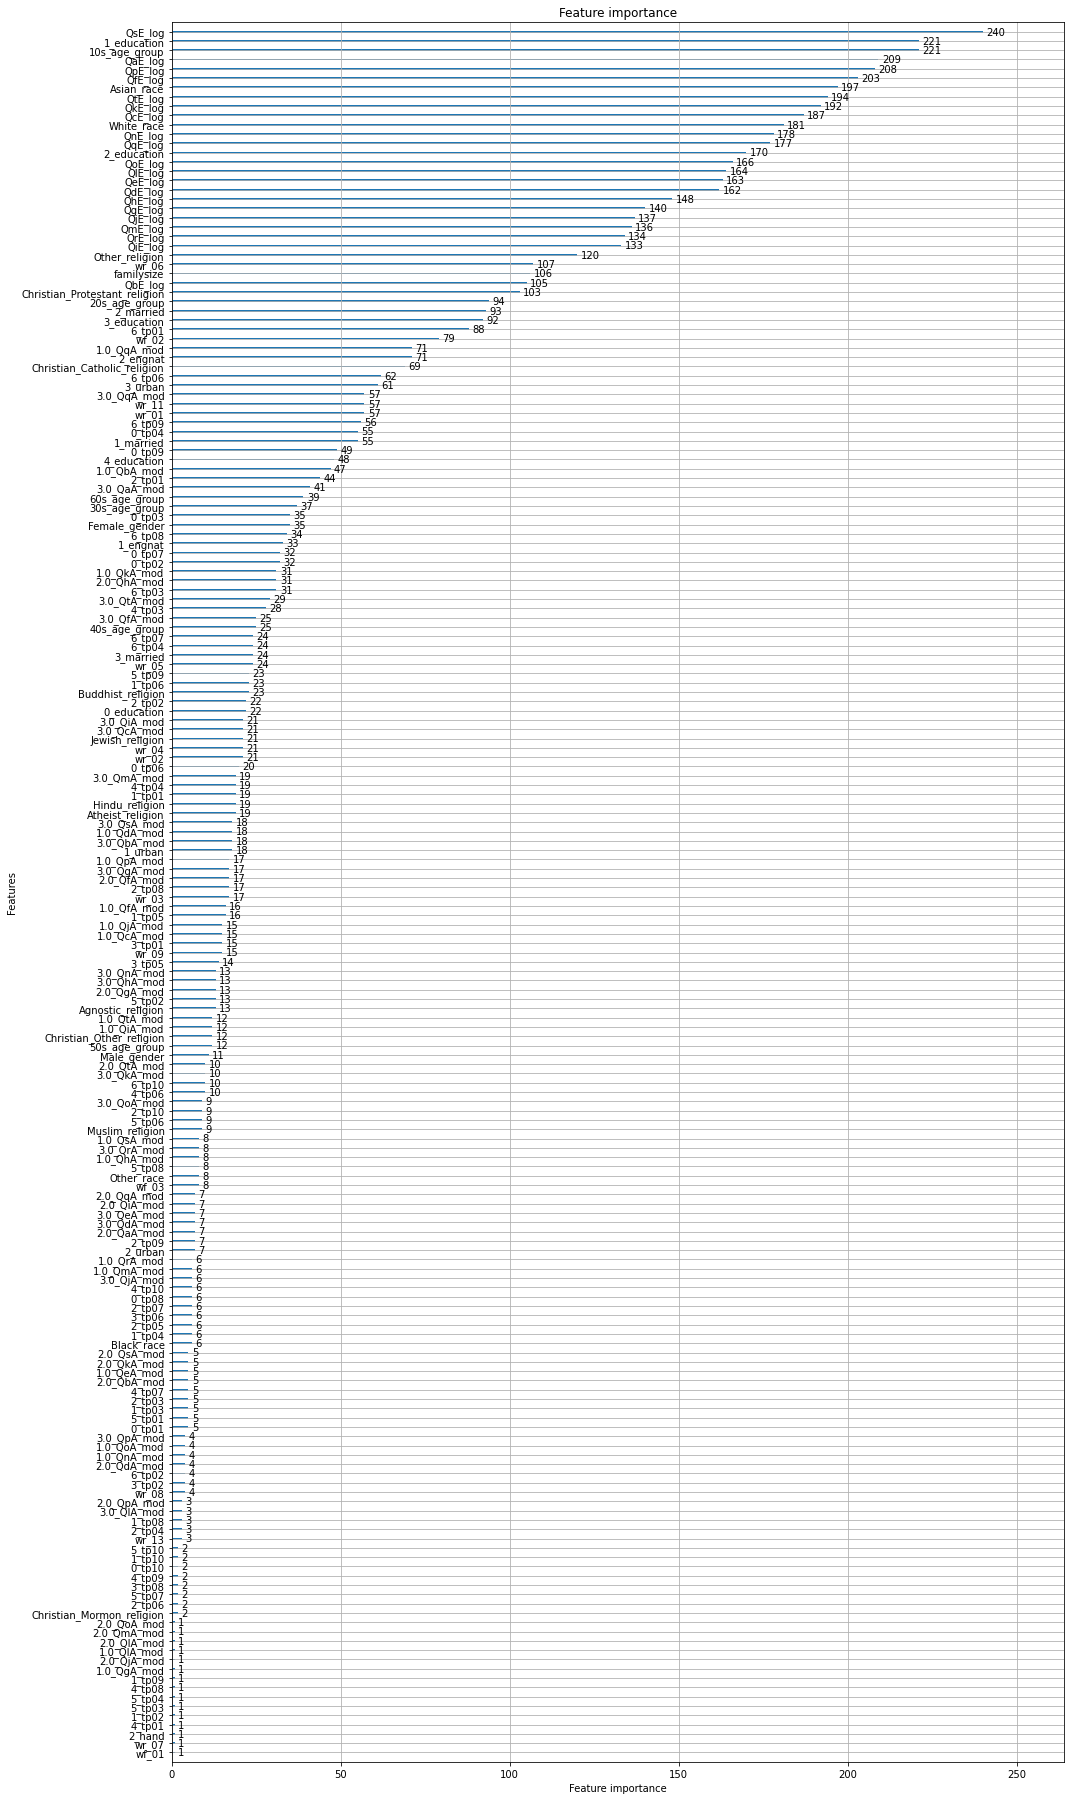

In [59]:
from lightgbm import plot_importance
plot_importance(lgb_model, figsize=(16,32))

In [90]:
preds = lgb_model.predict(test_data)

In [91]:
sub_data = pd.DataFrame()

In [92]:
sub_data['index'] = test_data.index
sub_data['voted'] = preds

In [93]:
sub_data.head()

,index,voted
0,0,2
1,1,2
2,2,2
3,3,1
4,4,2


In [94]:
sub_data.to_csv('feature_engineering02.csv', index=False)

## Score: 0.7057